In [1]:
import os

In [3]:
os.chdir('F:\\Library\\Analytics Path\\02-R\\02-R DataSets\\K means Clustering')

In [4]:
import pandas as pd

In [6]:
dataset = pd.read_csv('UniversalBank.csv')

In [7]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
dataset.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
del dataset['ID']

In [11]:
dataset[['Age','Experience']].corr()

,Age,Experience
Age,1.000000,0.994215
Experience,0.994215,1.000000


In [12]:
del dataset['Experience']

In [13]:
dataset.Age.isnull().sum()

0

In [14]:
dataset.Income.isnull().sum()

0

In [19]:
len(dataset.loc[:,'ZIP Code'].unique())

467

In [20]:
del dataset['ZIP Code']

In [21]:
dataset.dtypes

Age                     int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [22]:
len(dataset.Family.unique())

4

In [23]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [24]:
colsToDummy = ['Family']

In [26]:
dataset.Family.isnull().sum()

0

In [29]:
dataset.Education.isnull().sum()

0

In [30]:
len(dataset.Education.unique())

3

In [32]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [33]:
colsToDummy = colsToDummy + ['Education']

In [34]:
colsToDummy

['Family', 'Education']

In [35]:
dataset.dtypes

Age                     int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [36]:
dataset.Mortgage.isnull().sum()

0

In [37]:
dataset.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [38]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [50]:
dummiedCols = pd.get_dummies(dataset[colsToDummy])

In [44]:
del dummiedCosl

In [51]:
dummiedCols.head()

,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0,0,0,1,1,0,0
1,0,0,1,0,1,0,0
2,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0


In [48]:
dataset['Education'] = dataset['Education'].astype('category',copy = False)

In [49]:
dataset.dtypes

Age                      int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [52]:
dataset = dataset.drop(colsToDummy,axis = 1)

In [53]:
dataset = dataset.join(dummiedCols)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
scaled_data = scaler.fit_transform(dataset)

In [61]:
scaled_data[1:5,:]

array([[ 0.5       ,  0.12037037,  0.15      ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.36363636,  0.01388889,  0.1       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.27272727,  0.42592593,  0.27      ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.27272727,  0.1712963 ,  0.1       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ]])

In [62]:
sc_dataset = pd.DataFrame(scaled_data,columns = dataset.columns)

In [63]:
sc_dataset.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0.045455,0.189815,0.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.500000,0.120370,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.363636,0.013889,0.10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.272727,0.425926,0.27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.272727,0.171296,0.10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test = train_test_split(sc_dataset,test_size = 0.3,random_state = 0)

In [68]:
X_test.shape

(1500, 16)

In [69]:
from sklearn.cluster import KMeans

In [82]:
totWithinSS = []
for i in range(2,20):
    clust = KMeans(n_clusters= i)
    clust = clust.fit(X_train)
    totWithinSS.append(clust.inertia_)

In [83]:
totWithinSS

[6603.0316892788142,
 5573.8892489744012,
 5138.0247093793578,
 4746.3362617471412,
 4506.9959185594762,
 4179.4528474754079,
 3941.394780214222,
 3672.3578346486474,
 3378.0683027251166,
 3248.2348715188214,
 2968.7758878787513,
 2853.421001129861,
 2752.9268802348106,
 2692.2313883406928,
 2591.5053977055709,
 2535.313244275027,
 2469.2012469380584,
 2410.082845696028]

In [84]:
import matplotlib.pyplot as plt

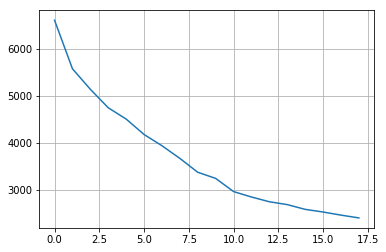

In [87]:
plt.plot(totWithinSS)
plt.grid()
plt.show()

In [88]:
clust = KMeans(n_clusters= 5)
clust = clust.fit(X_train)

In [90]:
df = pd.DataFrame(clust.cluster_centers_,columns = sc_dataset.columns)

In [96]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [97]:
df

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0.52,0.27,0.17,0.08,0.14,0.10,0.07,0.57,0.29,0.31,0.24,0.17,0.27,0.00,-0.00,1.00
1,0.48,0.25,0.17,0.09,0.10,0.12,0.08,0.63,0.33,-0.00,-0.00,0.44,0.56,1.00,0.00,-0.00
2,0.51,0.41,0.26,0.09,0.01,0.09,0.04,0.60,0.26,1.00,-0.00,0.00,-0.00,1.00,0.00,-0.00
3,0.50,0.44,0.27,0.11,0.00,0.11,0.05,0.60,0.31,0.00,1.00,0.00,-0.00,1.00,0.00,-0.00
4,0.51,0.26,0.17,0.08,0.14,0.12,0.07,0.60,0.28,0.23,0.17,0.28,0.32,0.00,1.00,0.00


In [98]:
preds = clust.predict(X_test)

In [99]:
type(preds)

numpy.ndarray

In [100]:
preds.shape

(1500,)

In [101]:
preds[:6]

array([3, 2, 0, 0, 3, 4])

In [102]:
X_test['clust'] = preds

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
X_test.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,clust
398,0.70,0.07,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,3
3833,0.23,0.35,0.01,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,2
4836,0.70,0.30,0.14,0.34,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0
4572,0.20,0.34,0.18,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0
636,0.39,0.52,0.61,0.31,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,3


In [105]:
X_test.values.shape

(1500, 17)